# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load a dataset
df=pd.read_csv('/content/drive/MyDrive/CS430/Linear Regression/data.csv')

In [5]:
# Check data
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

Dataset Inspection and Overview

1. Shape of the Dataset:
   The shape of the dataset is printed using `df.shape`, which returns the number of rows and columns. This gives a quick overview of the dataset's size.

2. Column Names and Representation:
   The loop iterates through `df.columns` to print each column name. This provides insight into the structure and content of the dataset by listing all its attributes.

3. Data Types of Each Column:
   The `df.dtypes` command prints the data type for each column. This helps in understanding the kind of data stored (e.g., integers, floats, objects, etc.), which is essential for any data manipulation or analysis tasks.


In [6]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Column names and their representation
print("\nColumn Names and their representation:")
for column in df.columns:
  print(column)

# Data type of each column
print("\nData type of each column:")
print(df.dtypes)


Shape of the dataset: (11914, 16)

Column Names and their representation:
Make
Model
Year
Engine Fuel Type
Engine HP
Engine Cylinders
Transmission Type
Driven_Wheels
Number of Doors
Market Category
Vehicle Size
Vehicle Style
highway MPG
city mpg
Popularity
MSRP

Data type of each column:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

 Checking for Missing Values

1. Identifying Missing Values:
   The `df.isnull().sum()` function is used to count the number of missing (null) values in each column. This step helps to detect any missing or incomplete data.

2. Displaying Columns with Missing Values:
   The condition `missing_values[missing_values > 0]` filters the columns to only display those that have missing values along with their respective counts. This helps focus on the columns that require attention, potentially guiding strategies for handling the missing data (e.g., imputation, removal, etc.).


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values and their counts
print("\nColumns with missing values and their counts:")
print(missing_values[missing_values > 0])



Columns with missing values and their counts:
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

 Summary Statistics of Numerical Columns

1. Extracting Numerical Columns:
   Using `df.select_dtypes(include=np.number)`, we select only the columns with numerical data types (e.g., integers, floats). This allows us to focus on numerical analysis without interference from non-numeric data.

2. Summary Statistics:
   The `describe()` function generates descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) for each numerical column. This provides a general overview of the distribution and variability of the data.

3. Detailed Statistics:
   - Mean: The average of each numerical column, calculated using `numerical_columns.mean()`.
   - Median: The middle value of each numerical column, calculated using `numerical_columns.median()`.
   - Minimum and Maximum: The smallest and largest values in each column, obtained via `numerical_columns.min()` and `numerical_columns.max()`, respectively.
   - Standard Deviation: The measure of the spread of data in each column, calculated using `numerical_columns.std()`.

   Each of these statistics is printed separately, offering a more detailed view of the central tendency and spread of the numerical data.


In [8]:
# Summary statistics of numerical columns
numerical_columns = df.select_dtypes(include=np.number)
summary_statistics = numerical_columns.describe()

print("\nSummary statistics of numerical columns:")
print(summary_statistics)

# Mean, median, min, max, and standard deviation of numerical columns
mean_values = numerical_columns.mean()
median_values = numerical_columns.median()
min_values = numerical_columns.min()
max_values = numerical_columns.max()
std_values = numerical_columns.std()

print("\nMean of numerical columns:")
print(mean_values)
print("\nMedian of numerical columns:")
print(median_values)
print("\nMinimum of numerical columns:")
print(min_values)
print("\nMaximum of numerical columns:")
print(max_values)
print("\nStandard Deviation of numerical columns:")
print(std_values)



Summary statistics of numerical columns:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03 

### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

 Distribution of the Target Variable (`MSRP`)

1. Setting the Target Variable:*
   The variable `target_variable` is assigned the value `'MSRP'`, which represents the column containing the data we are interested in visualizing.

2. Creating a Histogram:
   The `plt.hist()` function is used to plot a histogram of the `MSRP` values, with the number of bins set to 500. This allows us to observe how the values are distributed across a wide range.

3. Plot Customization:
   - `plt.xlabel()` and `plt.ylabel()` are used to label the x-axis (MSRP) and y-axis (Frequency).
   - `plt.title()` sets the title of the plot to "Distribution of MSRP".
   - `plt.figure(figsize=(10, 6))` ensures the plot is sized appropriately for better readability.

4. Displaying the Histogram:
   The `plt.show()` function displays the histogram, allowing us to visualize the frequency distribution of the `MSRP` values, which helps to understand the spread and shape (e.g., skewness) of the target variable.


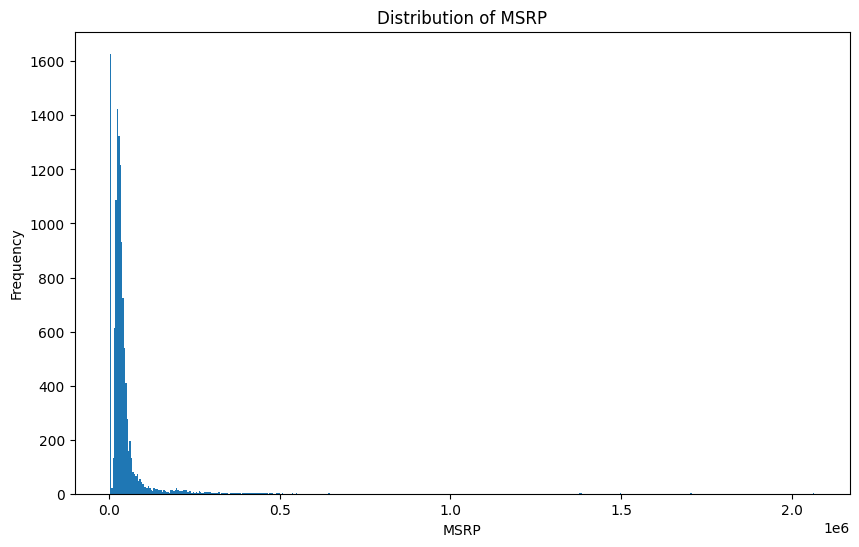

In [9]:
target_variable = 'MSRP'

plt.figure(figsize=(10, 6))
plt.hist(df[target_variable], bins=500)
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()


### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

 Correlation Matrix and Relationship with Target Variable

1. Calculating the Correlation Matrix:
   The `numerical_columns.corr()` function calculates the correlation matrix, showing pairwise correlation coefficients between all numerical features. This helps in identifying relationships between different variables.

2. Visualizing the Correlation Matrix:
   The heatmap is created using `sns.heatmap()` to display the correlation matrix visually. The following customizations are made:
   - `annot=True` adds the correlation coefficient values to each cell.
   - `cmap='coolwarm'` uses a diverging color map to differentiate between positive and negative correlations.
   - `fmt=".2f"` formats the values to two decimal places for clarity.
   This visualization helps to quickly spot highly correlated features and those with little or no correlation.

3. Correlation with the Target Variable (`MSRP`):
   - The correlations of each numerical feature with the target variable are extracted and sorted in descending order using `correlation_matrix[target_variable].sort_values(ascending=False)`. This allows us to identify which features are strongly related to the target.

4. Features with High Positive or Negative Correlations:
   - High Positive Correlations: Features with a correlation coefficient greater than 0.7 are considered highly positively correlated with the target variable.
   - High Negative Correlations: Features with a correlation coefficient less than -0.7 are considered highly negatively correlated with the target variable.
   Identifying these features helps in understanding which variables could be strong predictors for the target (`MSRP`) and informs feature selection for modeling.


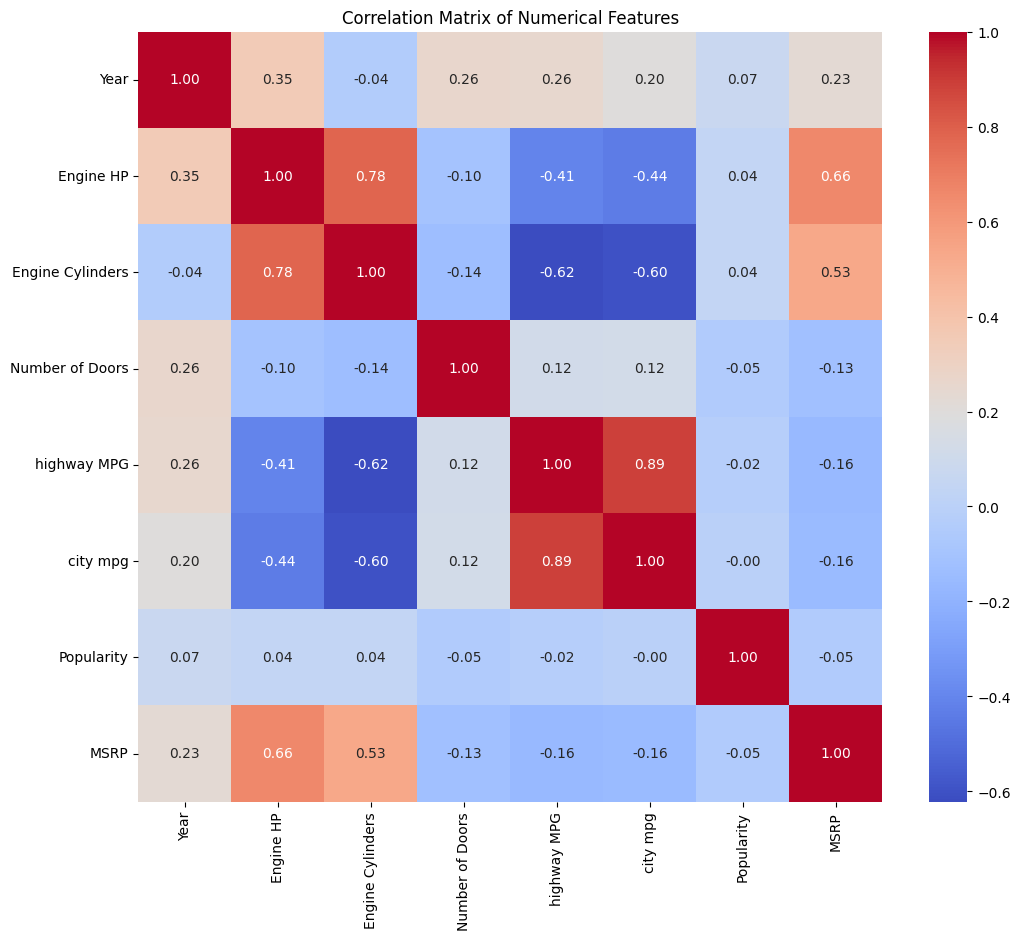


Correlation with target variable:
MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
Number of Doors    -0.126635
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64

Features with high positive correlations with target:
MSRP    1.0
Name: MSRP, dtype: float64

Features with high negative correlations with target:
Series([], Name: MSRP, dtype: float64)


In [10]:
# Correlation Matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Find features highly correlated with the target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(correlation_with_target)

# Identify features with high positive or negative correlations
high_positive_correlations = correlation_with_target[correlation_with_target > 0.7]
high_negative_correlations = correlation_with_target[correlation_with_target < -0.7]

print("\nFeatures with high positive correlations with target:")
print(high_positive_correlations)

print("\nFeatures with high negative correlations with target:")
print(high_negative_correlations)



### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

 Boxplots, Scatter Plots, and Outlier Removal

1. Boxplots for Numerical Features:
   - A boxplot is created for each numerical feature using `sns.boxplot()`, which visualizes the distribution of data and highlights potential outliers. The `for` loop iterates over all numerical columns, generating individual plots.
   - Each boxplot displays the median, interquartile range (IQR), and possible outliers for each feature. This allows for a visual inspection of outliers across multiple features.

2. Scatter Plot for Outlier Identification:
   - A scatter plot of `Engine HP` vs. `MSRP` is plotted to check for any relationships between the two features and to visually identify potential outliers. This helps in understanding if outliers in one feature (e.g., `Engine HP`) correspond to extreme values in the target variable (`MSRP`).

3. Outlier Removal using the IQR Method:
   - The IQR (Interquartile Range) method is used to detect and remove outliers. For each column:
     - The first quartile (Q1) and third quartile (Q3) are calculated.
     - The IQR is computed as `Q3 - Q1`, and any value outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` is considered an outlier.
   - The `remove_outliers()` function applies this method to filter the dataset and remove rows with outliers for all numerical columns (except `'Number of Doors'`).

4. Boxplots Without Outliers:
   - After removing outliers, new boxplots are generated for the numerical features to observe the data distributions without the influence of outliers. This gives a clearer representation of the spread and range of values within a more normalized dataset.

5. Scatter Plot Without Outliers:
   - A scatter plot of `Engine HP` vs. `MSRP` is plotted again, but this time using the cleaned dataset (`df_no_outliers`). This helps to visualize the relationship between these two features after the removal of extreme values, which can lead to better insights into the correlation between them.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

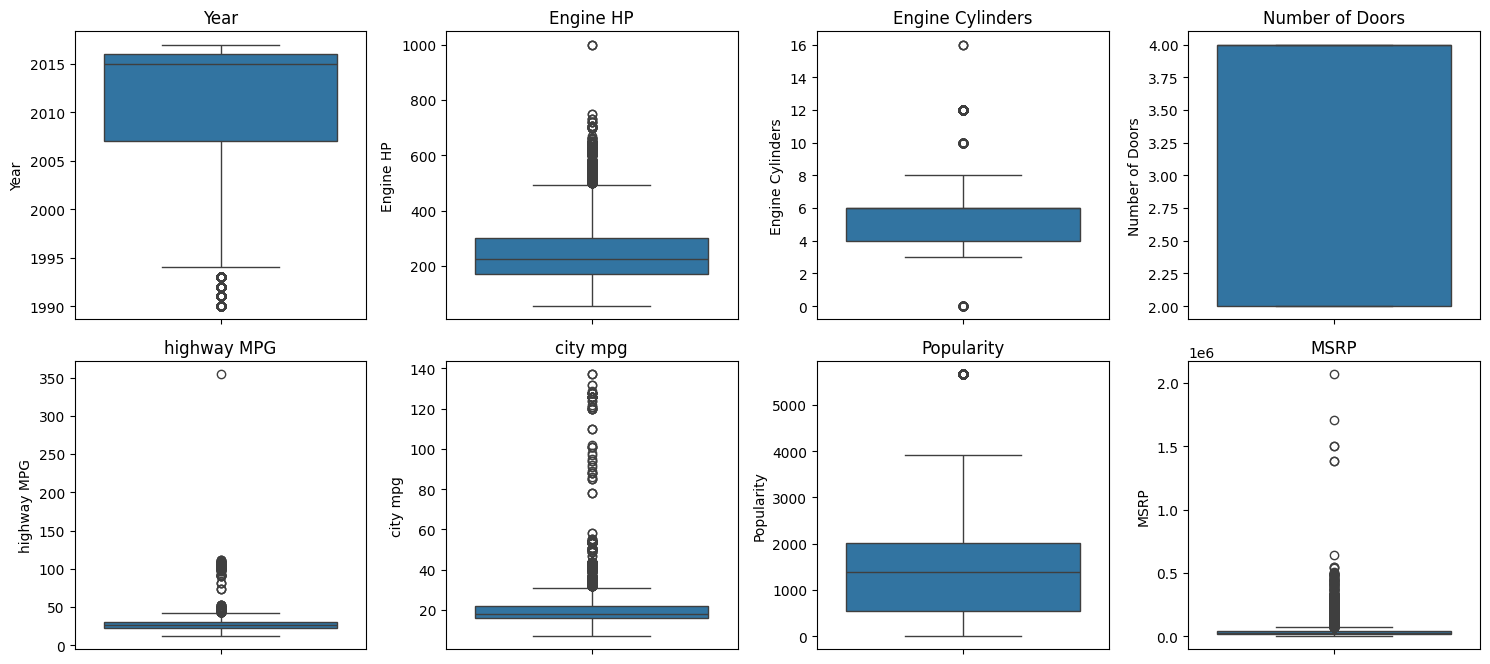

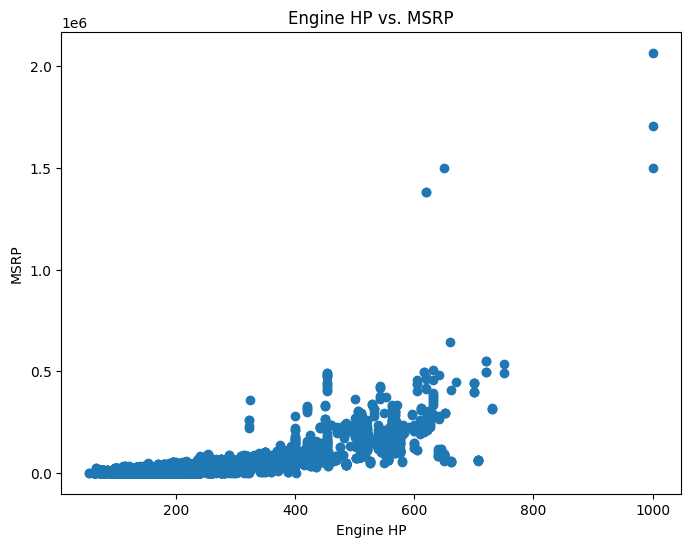

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

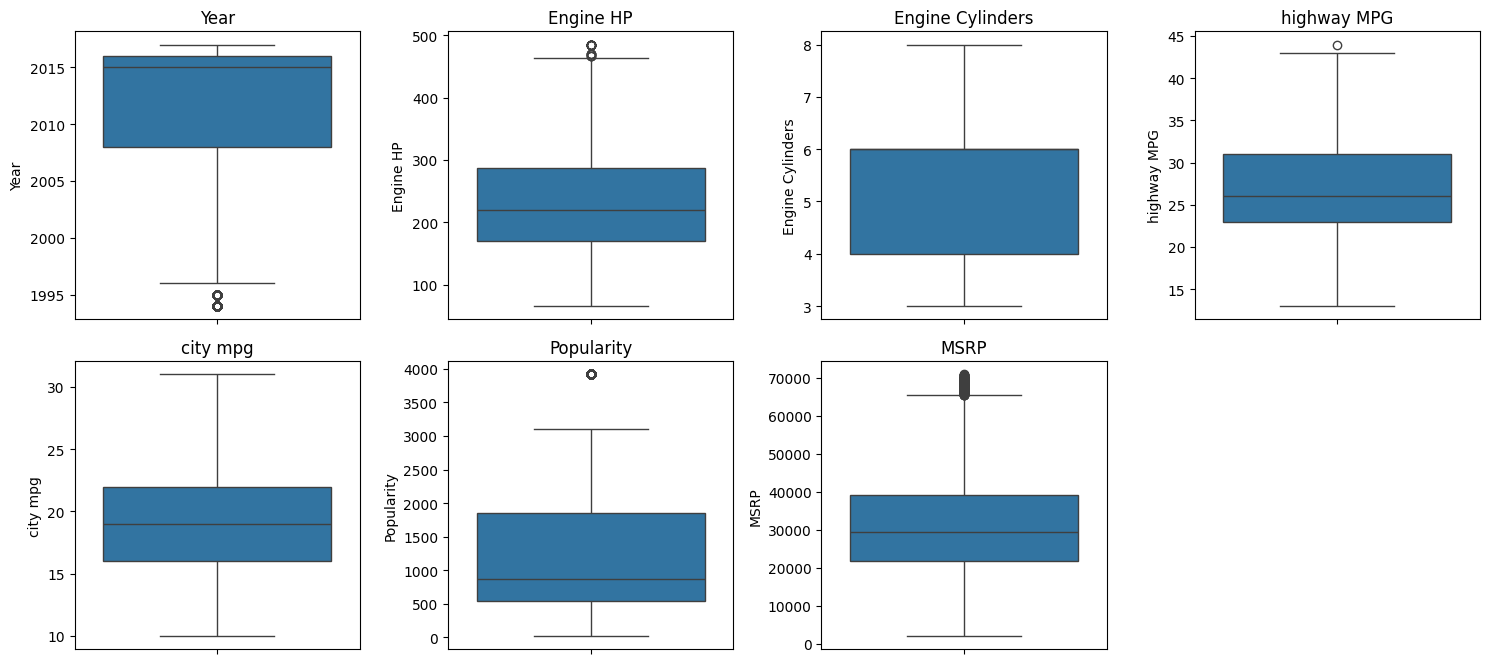

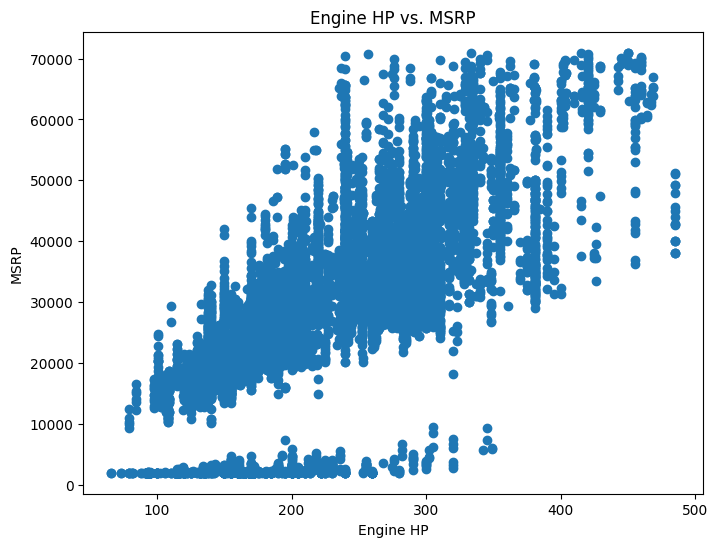

In [11]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

# Scatter plots for potential outlier identification
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine HP'], df['MSRP'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs. MSRP')
plt.show()

# Function to remove outliers based on IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns excluding 'Number of Doors'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Number of Doors'])

# Remove outliers for all numerical columns except 'Number of Doors'
df_no_outliers = df.copy()
for column in numerical_columns.columns:
    df_no_outliers = remove_outliers(df_no_outliers, column)

# Boxplots for numerical features without outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Scatter plots without outliers
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Engine HP'], df_no_outliers['MSRP'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs. MSRP')
plt.show()

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

 Checking and Removing Duplicate Rows

1. Identifying Duplicate Rows:
   The `df.duplicated()` function checks for duplicate rows in the dataset. It returns `True` for rows that are duplicates and `False` otherwise. These duplicates are filtered and stored in `duplicate_rows`.

2. Printing the Number of Duplicate Rows:
   The length of the `duplicate_rows` dataframe is printed using `len()`, which gives the total number of duplicate entries in the dataset. This step helps to quantify the issue.

3. Removing Duplicate Rows:
   If duplicates are detected, `df.drop_duplicates(inplace=True)` is used to remove them directly from the dataframe. The `inplace=True` argument ensures that the changes are made in the original dataframe without needing to reassign it.

4. Rechecking the Number of Duplicate Rows:
   After removing duplicates, the code prints the count of duplicate rows again to confirm that all duplicates have been successfully removed. However, in the last `print` statement, it should actually re-check for duplicates using `df[df.duplicated()]` instead of printing the previous count.


In [20]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

# there are duplicate rows, you can remove them using:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows:",len(duplicate_rows))

Number of duplicate rows: 0
Number of duplicate rows: 0


### Split into features and target

 Defining Features (`X`) and Target Variable (`y`)

1. Separating Features and Target:
   - The dataframe `df` is split into features (`X`) and the target variable (`y`).
   - The target variable is assumed to be `'MSRP'`, which is the column we want to predict.
   - `X = df.drop('MSRP', axis=1)` removes the `'MSRP'` column from the feature set, leaving only the independent variables.
   - `y = df['MSRP']` isolates the target variable in a separate series, which will be used for prediction in subsequent modeling tasks.

This step is crucial in preparing the dataset for machine learning, where `X` contains the input data, and `y` is the output (target) we want to predict.


In [13]:
# Assuming 'MSRP' is the target variable
X = df.drop('MSRP', axis=1)
y = df['MSRP']


### Feature Engineering

 Identifying Numerical and Categorical Columns

1. Numerical Features:
   - The list `numerical_features` contains the names of the columns that are numerical in nature. These columns represent quantitative data, which can be used directly in mathematical operations:
     - `Year`
     - `Engine HP`
     - `Engine Cylinders`
     - `highway MPG`
     - `Popularity`

2. Categorical Features:
   - The list `categorical_features` includes the columns that contain categorical data, representing discrete labels or categories:
     - `Make`
     - `Model`
     - `Engine Fuel Type`
     - `Driven_Wheels`
     - `Transmission Type`
     - `Market Category`
     - `Vehicle Size`
     - `Vehicle Style`

In [14]:
# Identify numerical and categorical columns
numerical_features = ['Year','Engine HP','Engine Cylinders','highway MPG','Popularity']
categorical_features = ['Make','Model','Engine Fuel Type','Driven_Wheels','Transmission Type','Market Category','Vehicle Size','Vehicle Style']


### Preprocessing Pipelines

 Preprocessing Pipelines for Numerical and Categorical Features

1. Numerical Feature Preprocessing:
   - The `numerical_transformer` pipeline is created to handle preprocessing of numerical features. It includes:
     - Imputation: Missing values are filled with the mean of the column using `SimpleImputer(strategy='mean')`.
     - Scaling: The features are standardized using `StandardScaler()` to ensure that all numerical features have a mean of 0 and a standard deviation of 1. This is essential for many machine learning algorithms to perform optimally.

2. Categorical Feature Preprocessing:
   - The `categorical_transformer` pipeline is used to preprocess categorical features. It includes:
     - Imputation: Missing values in categorical columns are filled with the most frequent category using `SimpleImputer(strategy='most_frequent')`.
     - Encoding: The categorical features are encoded using `OneHotEncoder()`, which converts categorical variables into a binary matrix of 1s and 0s. The argument `handle_unknown='ignore'` ensures that unknown categories encountered during prediction won't cause errors.

3. Combining Preprocessing for Both Numerical and Categorical Features:
   - The `preprocessor` combines both numerical and categorical transformers using `ColumnTransformer`. This ensures that each feature is processed according to its type:
     - Numerical Features: Processed with `numerical_transformer`.
     - Categorical Features: Processed with `categorical_transformer`.

This pipeline prepares the dataset by handling missing data, scaling numerical features, and encoding categorical variables—steps that are crucial for training machine learning models effectively.


In [15]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
print(numerical_transformer)
print(categorical_transformer)



Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])


### Create a function to build and evaluate models using pipelines

 Model Evaluation Function

1. Function Definition:
   The function `evaluate_model()` is defined to assess the performance of a given machine learning model. It takes the following parameters:
   - `model`: The machine learning model to be evaluated.
   - `X_train`: The training feature set.
   - `X_test`: The testing feature set.
   - `y_train`: The true labels for the training set.
   - `y_test`: The true labels for the testing set.

2. Fitting the Model:
   - The model is fitted to the training data using `model.fit(X_train, y_train)`. This step trains the model on the provided features and labels.

3. Making Predictions:
   - Predictions are made on the test set using `y_pred = model.predict(X_test)`. This step generates predicted values based on the test features.

4. Calculating Evaluation Metrics:
   - The function computes two key metrics to evaluate the model's performance:
     - Mean Squared Error (MSE): Calculated using `mean_squared_error(y_test, y_pred)`, it measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.
     - R² Score: Calculated using `r2_score(y_test, y_pred)`, it indicates the proportion of variance in the dependent variable that is predictable from the independent variables. An R² score closer to 1 suggests a better fit.

5. Printing Results:
   - The function prints the model's name, Mean Squared Error, and R² Score for easy reference. A separator line is printed for better readability.

This function provides a streamlined way to evaluate different models, allowing for quick comparisons of their performance on the same dataset.


In [16]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

 Splitting the Dataset into Training and Testing Sets

1. Purpose of Splitting:
   The dataset is split into training and testing sets to evaluate the performance of machine learning models. The training set is used to fit the model, while the testing set is reserved for assessing how well the model generalizes to unseen data.

2. Using `train_test_split`:
   The `train_test_split()` function from `sklearn.model_selection` is employed for this purpose. It randomly divides the data into two sets based on the specified parameters:
   - `X`: The features to be used for training and testing.
   - `y`: The target variable that we aim to predict.
   - `test_size=0.2`: This indicates that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.
   - `random_state=42`: Setting a random seed ensures reproducibility. The same random state will produce the same split every time the code is run.

3. Output Variables:
   The result of the split is four variables:
   - `X_train`: The training feature set.
   - `X_test`: The testing feature set.
   - `y_train`: The true labels for the training set.
   - `y_test`: The true labels for the testing set.

This process prepares the data for subsequent modeling and evaluation steps, ensuring that the model can be trained and tested effectively.


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

 Regression Pipelines

1. Purpose of Pipelines:
   Pipelines streamline the process of preprocessing data and fitting models, ensuring that all steps are executed in sequence. This structure helps maintain clean code and prevents data leakage between training and testing phases.

2. Linear Regression Pipeline:
   - Pipeline Name: `linear_pipeline`
   - Steps:
     - Preprocessing: Applies the `preprocessor` defined earlier, which handles both numerical and categorical features.
     - Model: Uses `LinearRegression()` as the regression model.

3. Ridge Regression Pipeline:
   - Pipeline Name: `ridge_pipeline`
   - Steps:
     - Preprocessing: Same as above, utilizing the `preprocessor`.
     - Model: Implements `Ridge(alpha=1.0)`, which applies L2 regularization to the linear regression model to mitigate overfitting.

4. Lasso Regression Pipeline:
   - Pipeline Name: `lasso_pipeline`
   - Steps:
     - Preprocessing: Utilizes the same preprocessing steps.
     - Model: Uses `Lasso(alpha=0.1)`, which applies L1 regularization. This can help in feature selection by forcing some coefficients to be exactly zero.

5. Stochastic Gradient Descent (SGD) Pipeline:
   - Pipeline Name: `sgd_pipeline`
   - Steps:
     - Preprocessing: As before, it employs the `preprocessor`.
     - Model: Utilizes `SGDRegressor(max_iter=1000, tol=1e-3)`, which optimizes the loss function using stochastic gradient descent.

6. Polynomial Regression Pipeline:
   - Pipeline Name: `polynomial_pipeline`
   - Steps:
     - Preprocessing: Applies the defined preprocessing steps.
     - Polynomial Features: Uses `PolynomialFeatures(degree=2)` to create polynomial features, allowing the model to capture non-linear relationships.
     - Model: Follows with `LinearRegression()` to fit the polynomial features.

By organizing the regression models in pipelines, you ensure a consistent application of preprocessing and model fitting, which is essential for efficient experimentation and evaluation of different regression techniques.


In [18]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

### Evaluate all models

Evaluating Different Regression Models

1. Purpose:
   This code iterates through a list of various regression pipelines—`linear_pipeline`, `ridge_pipeline`, `lasso_pipeline`, `sgd_pipeline`, and `polynomial_pipeline`—to evaluate their performance using the `evaluate_model` function defined earlier. This allows for a comparison of how well each model predicts the target variable (`MSRP`).

2. Loop Through Pipelines:
   The `for` loop executes the following steps for each pipeline:
   - Calls the `evaluate_model()` function with the current `pipeline` and the training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).
   - The model is fitted to the training data, predictions are made on the test set, and evaluation metrics (Mean Squared Error and R² Score) are calculated and printed.

3. Expected Output:
   - The output will include the model type (e.g., Linear Regression, Ridge Regression, etc.), along with the corresponding Mean Squared Error and R² Score for each model.
   - This comparison helps in determining which model performs best based on the given dataset and evaluation metrics.

By evaluating multiple regression models, you can identify the most effective approach for predicting the target variable in your dataset.


In [19]:
for pipeline in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(pipeline, X_train, X_test, y_train, y_test)


Model: LinearRegression
Mean Squared Error: 140783028.4347
R² Score: 0.9709
--------------------------------------------------
Model: Ridge
Mean Squared Error: 400251167.0100
R² Score: 0.9174
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139806217835.2077, tolerance: 3154786404.6895366
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 154302774.3130
R² Score: 0.9682
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 1472791453.3083
R² Score: 0.6960
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 191331428.4067
R² Score: 0.9605
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

The models vary in mean squared error and in r^2 value. SGDRegressor model did the best with the highest mean squared error and the best R^2. LinearRegression performed the best in terms of mean squared error and the highest R^2 value, making it the worst model.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.